In [1]:
import pandas as pd
import re
import nltk
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
from nltk.corpus import wordnet
from nltk.collections import Counter

In [2]:
data = pd.read_csv('clean_nus_sms.csv')
#data

# # Data Cleaning and tiding..


Removing the Unnamed: 0

In [3]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [4]:
data.head(10)

,id,Message,length,country,Date
0,10120,Bugis oso near wat...,21,SG,2003/4
1,10121,"Go until jurong point, crazy.. Available only ...",111,SG,2003/4
2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4
3,10123,Den only weekdays got special price... Haiz......,140,SG,2003/4
4,10124,Meet after lunch la...,22,SG,2003/4
5,10125,m walking in citylink now ü faster come down.....,65,SG,2003/4
6,10126,5 nights...We nt staying at port step liao...T...,51,SG,2003/4
7,10127,Hey pple...$700 or $900 for 5 nights...Excelle...,81,SG,2003/4
8,10128,Yun ah.the ubi one say if ü wan call by tomorr...,160,SG,2003/4
9,10129,Hey tmr maybe can meet you at yck,33,SG,2003/4


Checking for missing values and removing them.

In [5]:
data['Message'].isna().value_counts()

False    48595
True         3
Name: Message, dtype: int64

In [6]:
data = data.dropna(subset=['Message'])

In [7]:
data['length'].unique()

array(['21', '111', '46', '140', '22', '65', '51', '81', '160', '33',
       '41', '132', '23', '26', '31', '114', '45', '63', '53', '87', '60',
       '79', '25', '56', '47', '118', '82', '58', '155', '83', '28', '54',
       '93', '125', '107', '159', '116', '69', '48', '36', '34', '122',
       '142', '76', '14', '27', '97', '38', '119', '32', '133', '101',
       '74', '123', '104', '43', '62', '59', '42', '115', '44', '86',
       '78', '68', '102', '80', '39', '71', '90', '141', '131', '8', '70',
       '108', '18', '37', '110', '121', '15', '61', '67', '17', '96',
       '10', '24', '9', '19', '52', '16', '13', '3', '7', '20', '5', '75',
       '29', '11', '30', '73', '6', '64', '49', '88', '50', '92', '12',
       '105', '85', '77', '55', '103', '40', '4', '35', '84', '148', '98',
       '57', '149', '72', '2', '66', '137', '147', '158', '151', '94',
       '91', '95', '153', '89', '109', '134', '100', '156', '99', '135',
       '136', '129', '127', '164', '266', '130', '113', 

In [8]:
# there are 4 values that are representing an error in the text messsages, those errors are Err:508, Err:509, Err:510, Err:511
error508 = data[data.length == 'Err:508']
error509 = data[data.length == 'Err:509']
error510 = data[data.length == 'Err:510']
error511 = data[data.length == 'Err:511']
print(error508)
print(error509)
print(error510)
print(error511)

          id  Message   length    country    Date
31264  24234  Err:508  Err:508  Singapore  2011/4
          id  Message   length        country    Date
18485  10441  Err:509  Err:509  United States  2011/3
          id  Message   length    country    Date
32286  25413  Err:510  Err:510  Singapore  2011/4
         id  Message   length country    Date
9468  19896  Err:511  Err:511      SG  2003/4


In [9]:
data = data.drop(index= [31264, 18485, 32286, 9468])
data.length.unique()

array(['21', '111', '46', '140', '22', '65', '51', '81', '160', '33',
       '41', '132', '23', '26', '31', '114', '45', '63', '53', '87', '60',
       '79', '25', '56', '47', '118', '82', '58', '155', '83', '28', '54',
       '93', '125', '107', '159', '116', '69', '48', '36', '34', '122',
       '142', '76', '14', '27', '97', '38', '119', '32', '133', '101',
       '74', '123', '104', '43', '62', '59', '42', '115', '44', '86',
       '78', '68', '102', '80', '39', '71', '90', '141', '131', '8', '70',
       '108', '18', '37', '110', '121', '15', '61', '67', '17', '96',
       '10', '24', '9', '19', '52', '16', '13', '3', '7', '20', '5', '75',
       '29', '11', '30', '73', '6', '64', '49', '88', '50', '92', '12',
       '105', '85', '77', '55', '103', '40', '4', '35', '84', '148', '98',
       '57', '149', '72', '2', '66', '137', '147', '158', '151', '94',
       '91', '95', '153', '89', '109', '134', '100', '156', '99', '135',
       '136', '129', '127', '164', '266', '130', '113', 

In [10]:
# changing the Length column to numerical data type...
data.length = pd.to_numeric(data.length)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48591 entries, 0 to 48597
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       48591 non-null  int64 
 1   Message  48591 non-null  object
 2   length   48591 non-null  int64 
 3   country  48591 non-null  object
 4   Date     48591 non-null  object
dtypes: int64(2), object(3)
memory usage: 2.2+ MB


In [12]:
# Seperating the Date colum into months and year columns..
data['year'] = data.Date.str[:4]
data['month'] = data.Date.str[5:]
data = data.drop(columns='Date')
data.head()

,id,Message,length,country,year,month
0,10120,Bugis oso near wat...,21,SG,2003,4
1,10121,"Go until jurong point, crazy.. Available only ...",111,SG,2003,4
2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003,4
3,10123,Den only weekdays got special price... Haiz......,140,SG,2003,4
4,10124,Meet after lunch la...,22,SG,2003,4


In [13]:
data.month.unique()

array(['4', '11', '12', '1', '2', '3', '5', '6', '8', '9', '7', '10'],
      dtype=object)

In [14]:
data.replace('1', 'January', regex= False, inplace= True)
data.replace('2', 'February', regex= False, inplace= True)
data.replace('3', 'March', regex= False, inplace= True)
data.replace('4', 'April', regex= False, inplace= True)
data.replace('5', 'May', regex= False, inplace= True)
data.replace('6', 'June', regex= False, inplace= True)
data.replace('7', 'July', regex= False, inplace= True)
data.replace('8', 'August', regex= False, inplace= True)
data.replace('9', 'September', regex= False, inplace= True)
data.replace('10', 'October', regex= False, inplace= True)
data.replace('11', 'November', regex= False, inplace= True)
data.replace('12', 'December', regex= False, inplace= True)

In [15]:
data.month.unique()

array(['April', 'November', 'December', 'January', 'February', 'March',
       'May', 'June', 'August', 'September', 'July', 'October'],
      dtype=object)

In [16]:
data.country.unique()

array(['SG', 'MY', 'India', 'Pakistan', 'United States', 'Canada',
       'unknown', 'Serbia', 'United Kingdom', 'France', 'Singapore',
       'China', 'Malaysia', 'Sri Lanka', 'Spain', 'Bangladesh',
       'Philippines', 'Macedonia', 'Romania', 'Kenya', 'Slovenia',
       'New Zealand', 'Nigeria', 'Ghana', 'Indonesia', 'Nepal', 'Morocco',
       'USA', 'Lebanon', 'india', 'Trinidad and Tobago', 'INDIA',
       'srilanka', 'jamaica', 'Hungary', 'Australia', 'Italia',
       'BARBADOS', 'Turkey', 'UK'], dtype=object)

In [17]:
data.country.nunique()

40

In [18]:
# replacing some instances where a country is refered to in two different forms or names such as INDIA, india, and India..
data.replace('SG', 'Singapore', regex = False, inplace = True)
data.replace('MY', 'Malaysia', regex = False, inplace = True)
data.replace('USA', 'United States', regex = False, inplace = True)
data.replace('india', 'India', regex = False, inplace = True)
data.replace('INDIA', 'India', regex = False, inplace = True)
data.replace('srilanka', 'Sri Lanka', regex = False, inplace = True)
data.replace('jamaica', 'Jamaica', regex = False, inplace = True)
data.replace('UK', 'United Kingdom', regex = False, inplace = True)
data.replace('BARBADOS', 'Barbados', regex = False, inplace = True)

In [19]:
data.country.nunique()

33

In [20]:
data

,id,Message,length,country,year,month
0,10120,Bugis oso near wat...,21,Singapore,2003,April
1,10121,"Go until jurong point, crazy.. Available only ...",111,Singapore,2003,April
2,10122,I dunno until when... Lets go learn pilates...,46,Singapore,2003,April
3,10123,Den only weekdays got special price... Haiz......,140,Singapore,2003,April
4,10124,Meet after lunch la...,22,Singapore,2003,April
...,...,...,...,...,...,...
48593,45712,Come to me AFTER NOON,21,Serbia,2015,March
48594,45714,I LOVE YOU TOO,14,Serbia,2015,March
48595,45715,C-YA,4,Serbia,2015,March
48596,45717,BE MY GUEST,11,Serbia,2015,March


In [21]:
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

To get a better idea of the general outlook of the data we can use seaborn and matplot libraries to understand our data, it is hard to get a general idea just by looking at the table, graphs provide a general outlook to what we are dealing with, we can plot a graph that shows the number of text messages sent by each country and see which country has the highest and which country is the lowest, and we can also find which year recorded the highest number of messages sent.

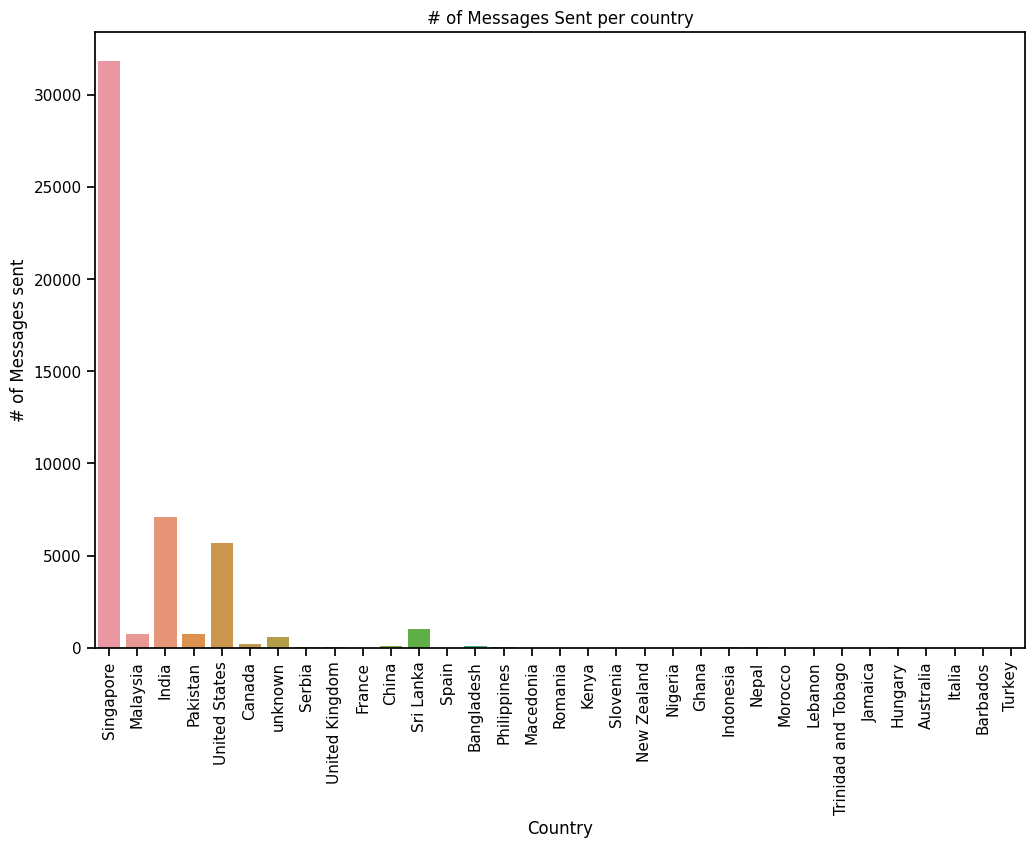

In [22]:
plt.figure(figsize=(12,8))
sns.set_context('notebook')
sns.countplot(data=data, x='country')
sns.set_context('notebook')
sns.color_palette('tab10')
plt.title('# of Messages Sent per country')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.ylabel('# of Messages sent')
plt.show()

Here we notice that majority of the texts or messaes sent in this data set originated from Singapore and in second place is India and USA at third

So any further operation such as finding out the TF and TF_idf and conducting sentiment analysis will be done for Singapore
because majority of the texts originated from there.

But before that lets find which years had the highest number of text messages sent and the average of the text length for each country.

In [23]:
data['year'].unique()

array(['2003', '2010', '2011', '2012', '2013', '2014', '2015'],
      dtype=object)

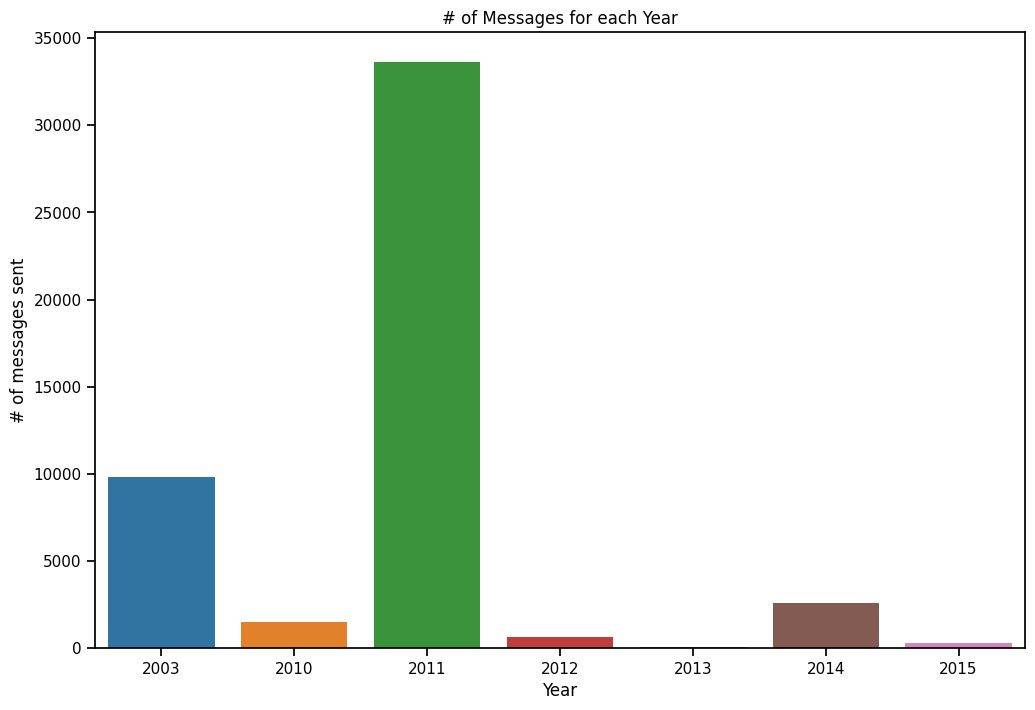

In [24]:
# messages sent for each year
plt.figure(figsize=(12,8))
sns.set_context('notebook')
sns.color_palette('Set2')
sns.countplot(data=data, x='year')
plt.title('# of Messages for each Year')
plt.xlabel('Year')
plt.ylabel('# of messages sent')
plt.show()

2011 has the highest amount of messages sent, and 2013 has the lowest messaes sent.

In [25]:
text_length = data.groupby(['country']).length.mean().reset_index()

In [26]:
text_length.sort_values(by=['length'], ascending = False, inplace = True)

In [27]:
print(text_length.nlargest(5, 'length'))

      country      length
3      Canada  103.782828
27  Sri Lanka   94.493792
14  Macedonia   92.200000
6       Ghana   73.500000
24  Singapore   55.996134


## Test preprocessing.

In [28]:
# Noise removal and whitespace removal..
def noise_removal(text):
    return re.sub(r',|\.|\:|;|-|/|&|!|\?|\(|\)|\+|@|<|>|#|~|=|\$|\*|[|]|{|}',' ',text)
def replace_apostrophy(text):
    return re.sub(r"'",' ',text)

def replace_cross_mark(text):
    return re.sub(r"┾",' ',text)
def whitespace_removal(text):
    return re.sub(r'\s+', ' ', text)
data.Message = data.Message.replace('<DECIMAL>', ' ', regex = False)

In [29]:
data.Message = data.Message.apply(lambda x: noise_removal(x))
data.Message = data.Message.apply(lambda x: replace_apostrophy(x))
data.Message = data.Message.apply(lambda x: replace_cross_mark(x))
data.Message = data.Message.apply(lambda x: whitespace_removal(x))
#we also need to apply the function .lower() to the text messages
data.Message = data.Message.apply(lambda x: x.lower())

## Tokenization and stopwords removal.

In [30]:
data['Message_token'] = data.Message.apply(lambda x: word_tokenize(x))

In [31]:
data

,id,Message,length,country,year,month,Message_token
0,10120,bugis oso near wat,21,Singapore,2003,April,"[bugis, oso, near, wat]"
1,10121,go until jurong point crazy available only in ...,111,Singapore,2003,April,"[go, until, jurong, point, crazy, available, o..."
2,10122,i dunno until when lets go learn pilates,46,Singapore,2003,April,"[i, dunno, until, when, lets, go, learn, pilates]"
3,10123,den only weekdays got special price haiz cant ...,140,Singapore,2003,April,"[den, only, weekdays, got, special, price, hai..."
4,10124,meet after lunch la,22,Singapore,2003,April,"[meet, after, lunch, la]"
...,...,...,...,...,...,...,...
48593,45712,come to me after noon,21,Serbia,2015,March,"[come, to, me, after, noon]"
48594,45714,i love you too,14,Serbia,2015,March,"[i, love, you, too]"
48595,45715,c ya,4,Serbia,2015,March,"[c, ya]"
48596,45717,be my guest,11,Serbia,2015,March,"[be, my, guest]"


In [32]:
stopwords = set(stopwords.words('english'))

In [33]:
# in order to remove the stopwords from each message in the data frame we can create an empty list, and
# make iterate through it for each row
data['Message_token_filtered'] = [list() for i in range(len(data['Message_token']))]
for i in range(len(data['Message_token'])):
    filtered_text = data.Message_token.iloc[i]
    for word in filtered_text:
        if not word in stopwords:
            data.Message_token_filtered.iloc[i].append(word)

In [34]:
data.head(20)

,id,Message,length,country,year,month,Message_token,Message_token_filtered
0,10120,bugis oso near wat,21,Singapore,2003,April,"[bugis, oso, near, wat]","[bugis, oso, near, wat]"
1,10121,go until jurong point crazy available only in ...,111,Singapore,2003,April,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n..."
2,10122,i dunno until when lets go learn pilates,46,Singapore,2003,April,"[i, dunno, until, when, lets, go, learn, pilates]","[dunno, lets, go, learn, pilates]"
3,10123,den only weekdays got special price haiz cant ...,140,Singapore,2003,April,"[den, only, weekdays, got, special, price, hai...","[den, weekdays, got, special, price, haiz, can..."
4,10124,meet after lunch la,22,Singapore,2003,April,"[meet, after, lunch, la]","[meet, lunch, la]"
5,10125,m walking in citylink now ü faster come down m...,65,Singapore,2003,April,"[m, walking, in, citylink, now, ü, faster, com...","[walking, citylink, ü, faster, come, hungry]"
6,10126,5 nights we nt staying at port step liao too ex,51,Singapore,2003,April,"[5, nights, we, nt, staying, at, port, step, l...","[5, nights, nt, staying, port, step, liao, ex]"
7,10127,hey pple 700 or 900 for 5 nights excellent loc...,81,Singapore,2003,April,"[hey, pple, 700, or, 900, for, 5, nights, exce...","[hey, pple, 700, 900, 5, nights, excellent, lo..."
8,10128,yun ah the ubi one say if ü wan call by tomorr...,160,Singapore,2003,April,"[yun, ah, the, ubi, one, say, if, ü, wan, call...","[yun, ah, ubi, one, say, ü, wan, call, tomorro..."
9,10129,hey tmr maybe can meet you at yck,33,Singapore,2003,April,"[hey, tmr, maybe, can, meet, you, at, yck]","[hey, tmr, maybe, meet, yck]"


## Lemmatization.

In [35]:
lemmatizer = WordNetLemmatizer()

In [36]:
# in order to counter the Error 'Resource wordnet not found'
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ahmed\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [37]:
def get_part_of_speech(word):
    part_of_speech = wordnet.synsets(word)
    pos_counts = Counter()
    pos_counts["n"] = len([item for item in part_of_speech if item.pos()=="n"])
    pos_counts["v"] = len([item for item in part_of_speech if item.pos()=="v"])
    pos_counts["a"] = len([item for item in part_of_speech if item.pos()=="a"])
    pos_counts["r"] = len([item for item in part_of_speech if item.pos()=="r"])
    most_likely_part_of_speech = pos_counts.most_common(1)[0][0]
    return most_likely_part_of_speech

In [38]:
data['Message_token_filltered_lemmatized'] = [list() for i in range(len(data['Message_token_filtered']))]

for i in range(len(data['Message_token_filtered'])):
    text = data.Message_token_filtered.iloc[i]
    for word in text:
        lemmatized = lemmatizer.lemmatize(word, get_part_of_speech(word))
        data.Message_token_filltered_lemmatized.iloc[i].append(lemmatized)

In [39]:
data.Message_token_filltered_lemmatized.head()

0                              [bugis, oso, near, wat]
1    [go, jurong, point, crazy, available, bugis, n...
2                      [dunno, let, go, learn, pilate]
3    [den, weekday, get, special, price, haiz, cant...
4                                    [meet, lunch, la]
Name: Message_token_filltered_lemmatized, dtype: object

Tf and TF_IDF for text messages that originated from singapore.

In [40]:
# Lets isolate text messages from singapore on its own data set
sg_data = data[data.country == 'Singapore']

In [41]:
sg_data.head(20)

,id,Message,length,country,year,month,Message_token,Message_token_filtered,Message_token_filltered_lemmatized
0,10120,bugis oso near wat,21,Singapore,2003,April,"[bugis, oso, near, wat]","[bugis, oso, near, wat]","[bugis, oso, near, wat]"
1,10121,go until jurong point crazy available only in ...,111,Singapore,2003,April,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazy, available, bugis, n..."
2,10122,i dunno until when lets go learn pilates,46,Singapore,2003,April,"[i, dunno, until, when, lets, go, learn, pilates]","[dunno, lets, go, learn, pilates]","[dunno, let, go, learn, pilate]"
3,10123,den only weekdays got special price haiz cant ...,140,Singapore,2003,April,"[den, only, weekdays, got, special, price, hai...","[den, weekdays, got, special, price, haiz, can...","[den, weekday, get, special, price, haiz, cant..."
4,10124,meet after lunch la,22,Singapore,2003,April,"[meet, after, lunch, la]","[meet, lunch, la]","[meet, lunch, la]"
5,10125,m walking in citylink now ü faster come down m...,65,Singapore,2003,April,"[m, walking, in, citylink, now, ü, faster, com...","[walking, citylink, ü, faster, come, hungry]","[walk, citylink, ü, fast, come, hungry]"
6,10126,5 nights we nt staying at port step liao too ex,51,Singapore,2003,April,"[5, nights, we, nt, staying, at, port, step, l...","[5, nights, nt, staying, port, step, liao, ex]","[5, night, nt, stay, port, step, liao, ex]"
7,10127,hey pple 700 or 900 for 5 nights excellent loc...,81,Singapore,2003,April,"[hey, pple, 700, or, 900, for, 5, nights, exce...","[hey, pple, 700, 900, 5, nights, excellent, lo...","[hey, pple, 700, 900, 5, night, excellent, loc..."
8,10128,yun ah the ubi one say if ü wan call by tomorr...,160,Singapore,2003,April,"[yun, ah, the, ubi, one, say, if, ü, wan, call...","[yun, ah, ubi, one, say, ü, wan, call, tomorro...","[yun, ah, ubi, one, say, ü, wan, call, tomorro..."
9,10129,hey tmr maybe can meet you at yck,33,Singapore,2003,April,"[hey, tmr, maybe, can, meet, you, at, yck]","[hey, tmr, maybe, meet, yck]","[hey, tmr, maybe, meet, yck]"


In [42]:
# Term Frequency analysis (TF) analysis for text originated from sigapore..

In [43]:
sg_msg = []
for i in range(len(sg_data['Message_token_filltered_lemmatized'])):
    text = sg_data.Message_token_filltered_lemmatized.iloc[i]
    for word in text:
        sg_msg.append(word)

sg_msg_count = Counter(sg_msg)
#sg_msg_count
# when we print the sg_msg_count it results as a Dictionary, so we need to turn it back to a data frame
#so we can organize it better..
sg_msg_word_counts = pd.DataFrame.from_dict(sg_msg_count, orient = 'index').reset_index()
sg_msg_word_counts
# there are two columns in this dataframe and they are index and '0'so we need to rename them into the following:
#index: word and '0': count
sg_msg_word_counts.rename(columns= {'index':'word', 0:'count'}, inplace = True)
# all we have to do is to sort the values by the count column from highest to lower.
sg_msg_word_counts.sort_values(by=['count'], ascending= False, inplace=True)

In [44]:
print(sg_msg_word_counts.nlargest(20,'count'))

        word  count
129        u   8283
93      haha   6630
4         go   4477
16       get   3097
2518     lol   2818
247       ok   1813
1454  hahaha   1752
263     late   1707
120     time   1631
153     okay   1608
1729      le   1458
100    think   1448
43      come   1371
38      meet   1368
64       one   1264
225       ur   1216
90        oh   1193
163      dun   1183
66       wan   1182
364      see   1110


In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

sing_corpus = []

for i in range(len(sg_data['Message_token_filltered_lemmatized'])):
    thislist = sg_data.Message_token_filltered_lemmatized.iloc[i]
    thisstring = ', '.join(thislist) 
    sing_corpus.append(thisstring)
sing_vectorizer = TfidfVectorizer(use_idf=True)
sing_tfidf_vectors = sing_vectorizer.fit_transform(sing_corpus)

for i in range(len(sg_data['Message_token_filltered_lemmatized'])):
    
    tfidf_vector = sing_tfidf_vectors[i]
    tfidf_results = pd.DataFrame(tfidf_vector.T.todense(), index = {v: k for k, v in sing_vectorizer.vocabulary_.items()}, columns = ["TF-IDF Score"])

    nonzero_words = tfidf_results[tfidf_results['TF-IDF Score'] > 0.0]
    if i == 0:
        sing_top_tfidf_scores = nonzero_words
    else:
        sing_top_tfidf_scores = pd.concat([sing_top_tfidf_scores, nonzero_words])

# Convert the DataFrame sing_top_tfidf_words to a list:
sing_top_tfidf_words = sing_top_tfidf_scores.index[sing_top_tfidf_scores['TF-IDF Score'] > 0.0].to_list()

sing_count_of_top_tfidf_words = Counter(sing_top_tfidf_words)

sing_top_tfidf_word_counts = pd.DataFrame.from_dict(sing_count_of_top_tfidf_words, orient='index').reset_index()

sing_top_tfidf_word_counts.rename(columns = {'index': 'word', 0: 'count'}, inplace = True)

sing_top_tfidf_word_counts.sort_values(by=["count"], ascending = False, inplace = True)

print(sing_top_tfidf_word_counts.nlargest(15,'count')['word'])


89       2713
10      13511
9       16663
2490    11400
238     11662
251      7533
116     12023
145      2303
1430     3318
1705    15001
98       4913
38       5133
36       2460
74       5401
214     12207
Name: word, dtype: int64


## Word embedding 

In [46]:
import gensim
from gensim.models import word2vec

In [47]:
sg_embedding = sg_data['Message_token_filltered_lemmatized'].tolist()

# create and train the model
sg_model = gensim.models.Word2Vec(sg_embedding, window=5, sg=1, hs=1, min_count=15, workers=2)

# train the model
sg_model.train(sg_embedding, total_examples=sg_model.corpus_count, epochs=30)

(4848646, 7101180)

In [48]:
sg_model.wv.most_similar('come', topn=5)

[('go', 0.6999204158782959),
 ('back', 0.5675495266914368),
 ('meet', 0.4732093811035156),
 ('reach', 0.432819664478302),
 ('u', 0.423145592212677)]

In [49]:
sg_model.wv.most_similar('haha', topn=5)

[('hahaha', 0.8440645337104797),
 ('yeah', 0.7513229846954346),
 ('p', 0.7410346865653992),
 ('ooo', 0.7175906300544739),
 ('okay', 0.6662936210632324)]

In [50]:
sg_model.wv.most_similar('time', topn=5)

[('u', 0.43059393763542175),
 ('ü', 0.40127232670783997),
 ('sem', 0.4008801579475403),
 ('go', 0.3916766047477722),
 ('day', 0.3913350999355316)]

In [51]:
sg_model.wv.most_similar('think', topn=5)

[('haha', 0.5293241143226624),
 ('know', 0.5103479623794556),
 ('yeah', 0.5074816346168518),
 ('p', 0.4871804118156433),
 ('leh', 0.48559436202049255)]